In [1]:
import pendulum


variable = "water_surface_height_above_reference_datum"
today = pendulum.today(tz="UTC")
yesterday = today.subtract(days=1)

buoy = "8771450"

url = (
    "https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?"
    "service=SOS"
    "&request=GetObservation"
    "&version=1.0.0"
    f"&observedProperty={variable}"
    f"&offering=urn:ioos:station:NOAA.NOS.CO-OPS:{buoy}"
    "&responseFormat=text/csv"
    f"&eventTime={yesterday:%Y-%m-%dT%H:%M:%SZ}/"
    f"{today:%Y-%m-%dT%H:%M:%SZ}"
    "&result=VerticalDatum==urn:ogc:def:datum:epsg::5103"
    "&dataType=PreliminarySixMinute"
)

print(url)

https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?service=SOS&request=GetObservation&version=1.0.0&observedProperty=water_surface_height_above_reference_datum&offering=urn:ioos:station:NOAA.NOS.CO-OPS:8771450&responseFormat=text/csv&eventTime=2019-10-14T00:00:00Z/2019-10-15T00:00:00Z&result=VerticalDatum==urn:ogc:def:datum:epsg::5103&dataType=PreliminarySixMinute


In [2]:
import pandas as pd


df = pd.read_csv(url, index_col="date_time", parse_dates=True)
df.index = df.index.tz_convert(None)
df.head()

,station_id,sensor_id,latitude (degree),longitude (degree),water_surface_height_above_reference_datum (m),datum_id,vertical_position (m),sigma,quality_flags
date_time,,,,,,,,,
2019-10-14 00:00:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.745,urn:ogc:def:datum:epsg::5103,1.379,0.004,1;0;0;0
2019-10-14 00:06:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.741,urn:ogc:def:datum:epsg::5103,1.379,0.004,1;0;0;0
2019-10-14 00:12:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.750,urn:ogc:def:datum:epsg::5103,1.379,0.005,0;0;0;0
2019-10-14 00:18:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.747,urn:ogc:def:datum:epsg::5103,1.379,0.004,1;0;0;0
2019-10-14 00:24:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.747,urn:ogc:def:datum:epsg::5103,1.379,0.003,1;0;0;0


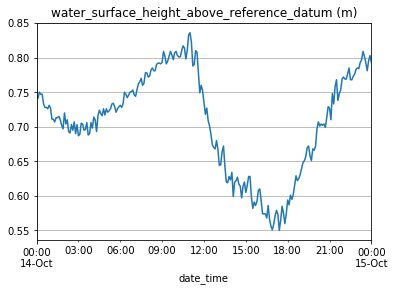

In [3]:
%matplotlib inline


col = df.columns[df.columns.str.startswith(variable)]
ax = df[col].plot.line(legend=False)
ax.grid(True)
ax.set_title(col.values[0]);

In [4]:
import folium


location = (
    df["latitude (degree)"].unique().squeeze(),
    df["longitude (degree)"].unique().squeeze()
)
popup = f"{df['sensor_id'].unique().squeeze()}"

m = folium.Map(location=location, zoom_start=12)
folium.Marker(location=location, popup=popup).add_to(m)

m